<a href="https://colab.research.google.com/github/HanifFaishalH/MachineLearning/blob/main/KUIS1_2341720116_Hanif_Faishal_Hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama :**
Hanif Faishal Hilmi

**Kelas :**
TI-3F

**NIM :**
2341720116

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [7]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# inspeksi data
df.info()

# mencari dan menghitung jumlah data yang hilang
missing_val = df.isnull().sum()

missing_val = missing_val[missing_val > 0]

print()
print("Variabel yang nilainya hilang dan jumlahnya")
print(missing_val)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Variabel yang nilainya hilang dan jumlahnya
workclass         963
occupation        966
nati

Setelah melakukan inspeksi dan mengecek isi data tiap kolom. Ada 3 variabel yang memiliki missing value (data hilang). Yaitu workclass, occupation, dan native-country

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [8]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# imputasi data pada fitur yang hilang
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-26834823.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Sudah tidak ada data yang hilang

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [9]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# inspeksi fitur kualitatif
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in 'race':
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Unique values in '

In [10]:
# penyesuaian fitur

# ganti value '?' dengan 'Other'
df['workclass'].replace('?', 'Others', inplace=True)
df['occupation'].replace('?', 'Others', inplace=True)
df['workclass'].replace('?', 'Others', inplace=True)

# kesalahan penulisan
df['native-country'].replace('Holand-Netherland', 'Netherlands', inplace=True)

# normalisasi income
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

#cek hasil
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}' after cleaning:")
    print(df[col].unique())


Unique values in 'workclass' after cleaning:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in 'education' after cleaning:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in 'marital-status' after cleaning:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in 'occupation' after cleaning:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship' after cleaning:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in 'race' aft

/tmp/ipython-input-3056638808.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

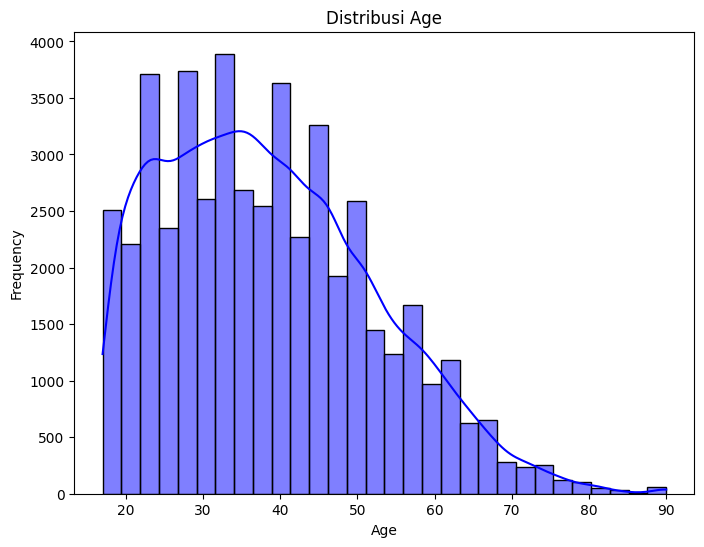

In [11]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-3855462571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')


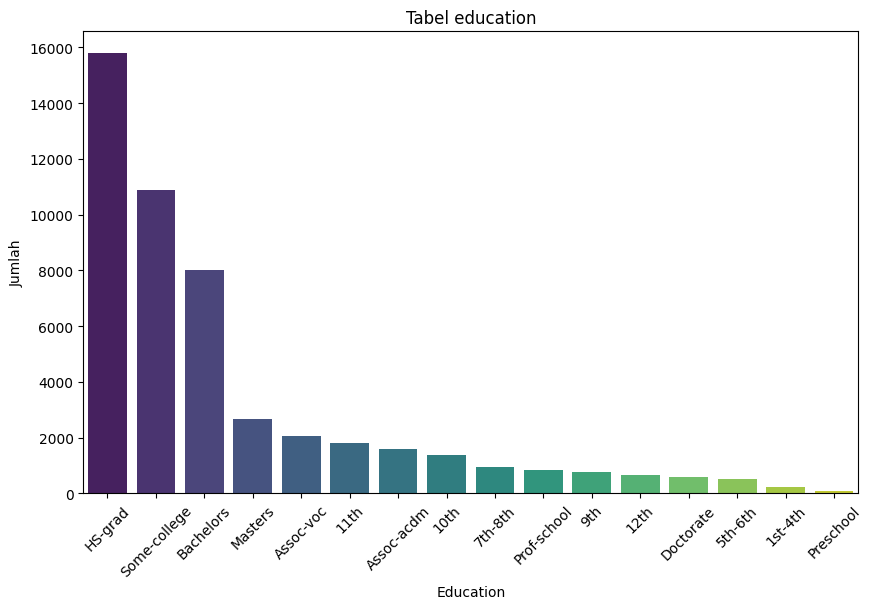

In [12]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')
plt.title('Tabel education')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

/tmp/ipython-input-1705922710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours-per-week', palette='Set2')


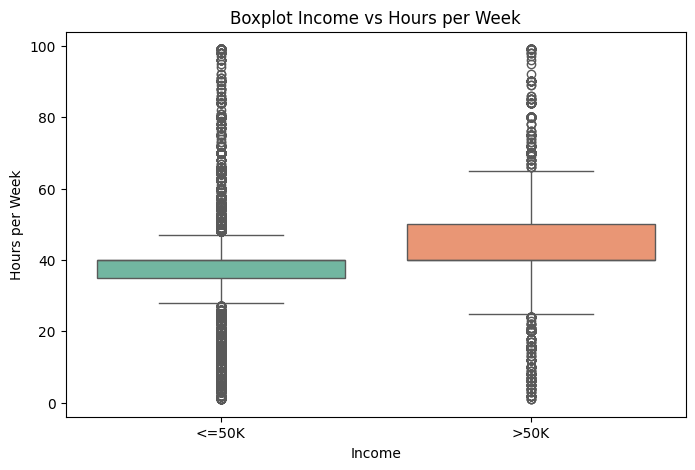

In [13]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='Set2')
plt.title('Boxplot Income vs Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

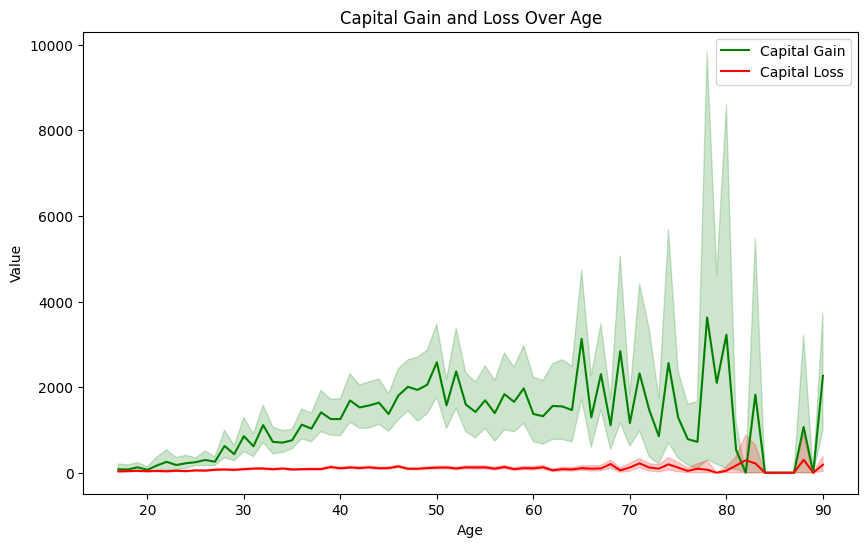

In [14]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='age', y='capital-gain', label='Capital Gain', color='green')
sns.lineplot(data=df, x='age', y='capital-loss', label='Capital Loss', color='red')
plt.title('Capital Gain and Loss Over Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [15]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

'''
  1. Dari gambar grafik histogram 'Age', distribusi data tersebut tidak simteris, tapi skewed ke kanan. Hal ini terjadi karena nilai median < mean
'''
mean_age = df['age'].mean()
median_age = df['age'].median()

print('Perbandingan nilai mean dan median pada data "Age"')
print("Mean Age   :", mean_age)
print("Median Age :", median_age)

'''
  2. Saya akan melakukan imputasi data dengan strategi median karena distribusi datanya tidak normal, sehingga median lebih baik digunakan.
'''

'''
  3. Menghitung outlier pada setiap kategori 'income' yang berkaitan dengan 'hour-per-week'
'''
print()
print("Mencari outlier dan kategori yang memiliki banyak outlier")
outlier_count = {}

for inc in df['income'].unique():
  subset = df[df['income'] == inc]['hours-per-week']

  q1 = subset.quantile(0.25)
  q3 = subset.quantile(0.75)

  lower_bound = q1 - 1.5 * (q3 - q1)
  upper_bound = q3 + 1.5 * (q3 - q1)

  outliers  = subset[(subset < lower_bound) | (subset > upper_bound)]

  outlier_count[inc] = {
      'Kategori': f"income = {inc}, variabel = hours-per-week",
      'Jumlah Data': subset.shape[0],
      'Jumlah Outlier': outliers.shape[0],
      'Persentase Outlier (%)': round((outliers.shape[0] / subset.shape[0]) * 100, 2)
    }

pd.DataFrame(outlier_count).T


Perbandingan nilai mean dan median pada data "Age"
Mean Age   : 38.64358543876172
Median Age : 37.0

Mencari outlier dan kategori yang memiliki banyak outlier


,Kategori,Jumlah Data,Jumlah Outlier,Persentase Outlier (%)
<=50K,"income = <=50K, variabel = hours-per-week",37155,11706,31.51
>50K,"income = >50K, variabel = hours-per-week",11687,781,6.68


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [16]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(df[['sex', 'income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

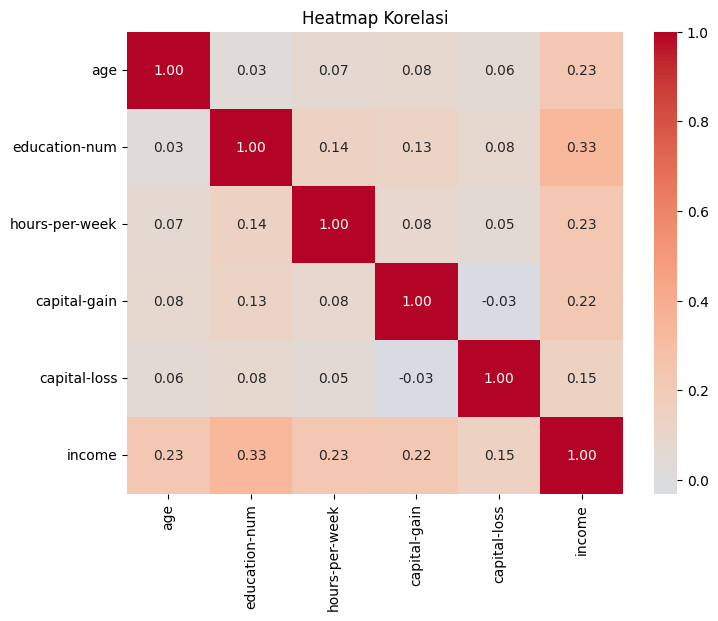

In [17]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# ambil subset kolom
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

# heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [18]:
# Hasil analisis jelaskan pada cell ini
'''
Dari heatmap tersebut saya mendapatkan informasi bahwa:
age, education-num, dan capital gain memiliki korelasi cukup kuat dengan income
'''

'\nDari heatmap tersebut saya mendapatkan informasi bahwa: \nage, education-num, dan capital gain memiliki korelasi cukup kuat dengan income\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [19]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


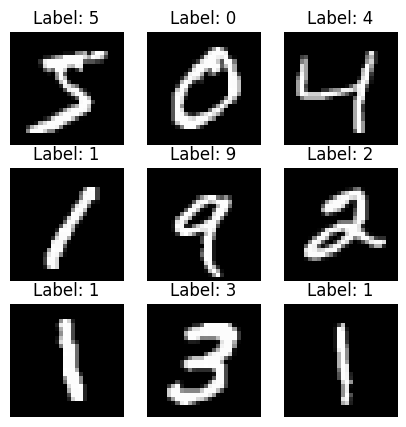

In [20]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Train shape after upsampling: (60000, 32, 32)
Test shape after upsampling : (10000, 32, 32)


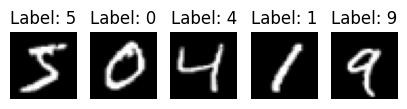

In [21]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# menentukan ukuran citra
targe_size = (32, 32)

# buat array kosong untuk hasil upsampling
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.uint8)
X_test_up = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# resize data train
for i in range(X_train.shape[0]):
  X_train_up[i] = cv2.resize(X_train[i], targe_size, interpolation=cv2.INTER_CUBIC)

# resize data test
for i in range(X_test.shape[0]):
  X_test_up[i] = cv2.resize(X_test[i], targe_size, interpolation=cv2.INTER_CUBIC)

print("Train shape after upsampling:", X_train_up.shape)
print("Test shape after upsampling :", X_test_up.shape)

plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [22]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# normalisasi ke rentang 0-1
X_train_up = X_train_up.astype('float32') / 255.0
X_test_up = X_test_up.astype('float32') / 255.0

# cek hasil normalisasi
print("Min-Max nilai train:", X_train_up.min(), "-", X_train_up.max())
print("Min-Max nilai test :", X_test_up.min(), "-", X_test_up.max())

Min-Max nilai train: 0.0 - 1.0
Min-Max nilai test : 0.0 - 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [23]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# membuat holder array kosong
X_test_flatten = np.zeros((
    X_test_up.shape[0],
    X_test_up.shape[1] * X_test_up.shape[2],
))

# proses flatten
for i in range(X_test_up.shape[0]):
  X_test_flatten[i, :] = X_test_up[i].flatten()

print("Shape data test setelah flatten:", X_test_flatten.shape)

Shape data test setelah flatten: (10000, 1024)
